<a href="https://colab.research.google.com/github/krzysztofnowakuz/DS_postgraduate/blob/main/modelling_not_only_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Zrozumienie biznesu

Data loading

In [ ]:
data = load_iris()

In [ ]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
dt = data.data

In [ ]:
dt

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
dt.shape    

(150, 4)

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
colour_dict = {0: 'red', 1: 'green', 2: 'blue'}
colours = [colour_dict[el] for el in y]
dataset = pd.concat([X, pd.DataFrame({'y': y, 'colour': colours})], axis=1)

In [ ]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,colour
0,5.1,3.5,1.4,0.2,0,red
1,4.9,3.0,1.4,0.2,0,red
2,4.7,3.2,1.3,0.2,0,red
3,4.6,3.1,1.5,0.2,0,red
4,5.0,3.6,1.4,0.2,0,red


# Wizualizacja

## Matplotlib

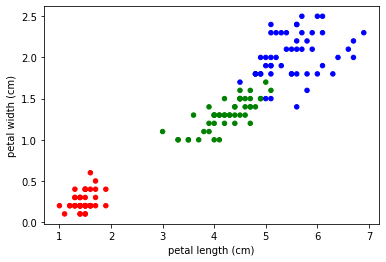

In [ ]:
# TODO ładniej
dataset.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', c='colour')

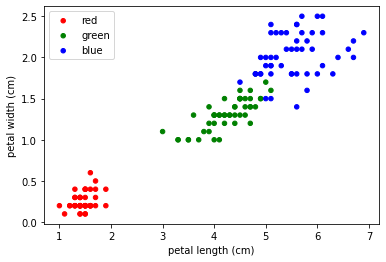

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for k, v in colour_dict.items():
  dataset[dataset['colour']==v].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', c='colour', label=v, ax=ax)
plt.show()

## Seaborn

In [ ]:
import seaborn as sns

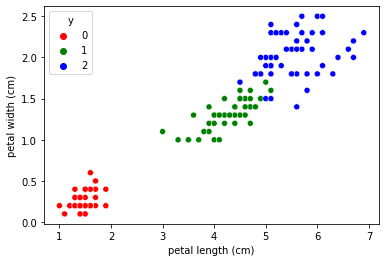

In [ ]:
sns.scatterplot(data=dataset, x='petal length (cm)', y='petal width (cm)', hue='y', palette=colour_dict)

## Bokeh

In [ ]:
from bokeh.plotting import figure, output_notebook, show

In [ ]:
output_notebook()

p = figure(plot_width=400, plot_height=400)
p.scatter(x='petal length (cm)', y='petal width (cm)', color='colour', legend_group='y', source=dataset)

show(p)

## Plotly

In [ ]:
import plotly.express as px

fig = px.scatter(dataset, x="petal length (cm)", y="petal width (cm)", color='y', size='sepal length (cm)', hover_data=['sepal width (cm)'], width=600, height=400, color_discrete_map=colour_dict)
fig.show()

In [ ]:
class C:
  pw = 'petal width (cm)'
  pl = 'petal length (cm)'
  sw = 'sepal width (cm)'
  sl = 'sepal length (cm)'

## Pandas

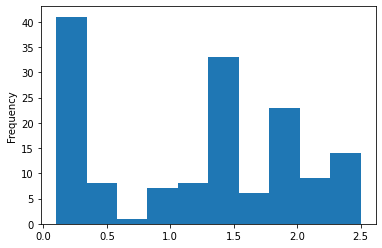

In [ ]:
dataset[C.pw].plot.hist()

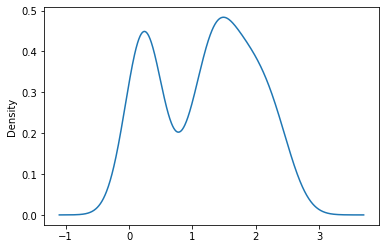

In [ ]:
dataset[C.pw].plot.kde()

# Modelowanie

In [ ]:
pd.value_counts(y)

2    50
1    50
0    50
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [ ]:
pd.value_counts(y_train)

2    40
1    40
0    40
dtype: int64

In [ ]:
X_test.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,30.000000,30.000000,30.000000,30.000000
mean,5.930000,3.070000,3.793333,1.223333
std,0.962092,0.447329,1.879643,0.780664
min,4.400000,2.200000,1.000000,0.200000
25%,5.100000,2.925000,1.425000,0.300000
50%,6.100000,3.000000,4.700000,1.450000
75%,6.650000,3.275000,5.000000,1.800000
max,7.700000,4.200000,6.700000,2.500000


In [ ]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.821667,3.054167,3.749167,1.193333
std,0.794115,0.434808,1.743704,0.760775
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# TODO ukryć/ usunąć
pd.value_counts(y_train, normalize=True)

2    0.333333
1    0.333333
0    0.333333
dtype: float64

In [ ]:
pd.value_counts(y_test, normalize=True)

2    0.333333
1    0.333333
0    0.333333
dtype: float64

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
ypred = dtree.predict(X_test)

In [ ]:
ypred

array([1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2,
       1, 1, 2, 2, 1, 1, 1, 1])

In [ ]:
y_test

array([1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 2, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_test, ypred)

0.8333333333333334

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      0.70      0.74        10
           2       0.73      0.80      0.76        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



## Wizualizacja modelu

In [ ]:
from sklearn.tree import plot_tree

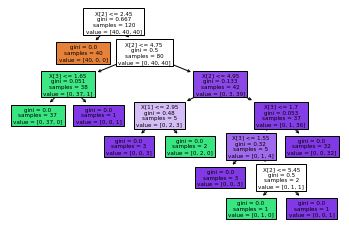

In [ ]:
plot_tree(dtree, filled=True);

In [ ]:
import graphviz
from sklearn import tree

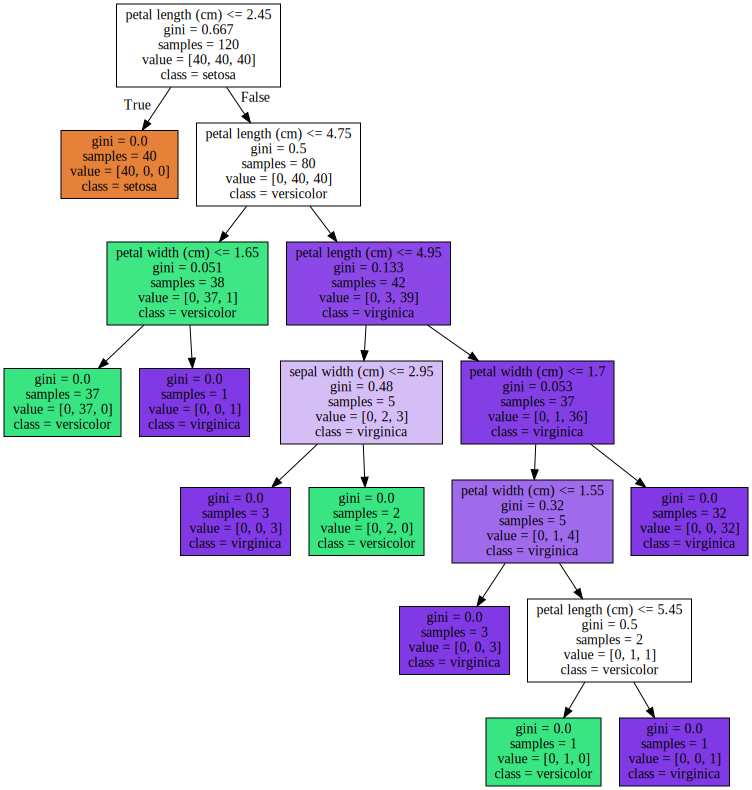

In [ ]:
dot_data = tree.export_graphviz(
    dtree,
    out_file=None,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
!pip install dtreeviz
from dtreeviz.trees import *

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.2-cp37-none-any.whl size=60009 sha256=7c733ffb444be5cdfb560e03b445f08ef0c44b493dad407bc78610702e0310e1
  Stored in directory: /root/.cache/pip/wheels/b9/4b/20/0bde3e04ace9178327ffabf575f9bbc4abb1d0c4f8c355306a
Successfully built dtreeviz


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


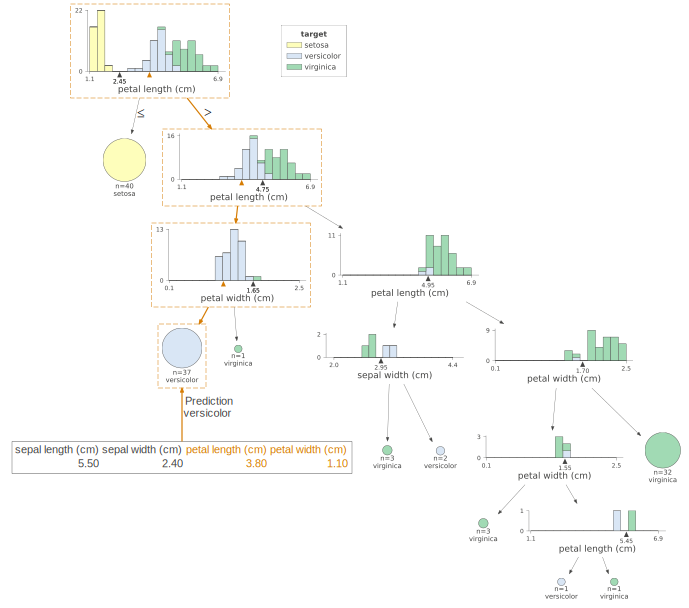

In [ ]:
viz = dtreeviz(dtree, X_train, y_train,
              target_name="target",
              feature_names=data.feature_names,
              class_names=list(data.target_names),
               X=X_test.iloc[0])

viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


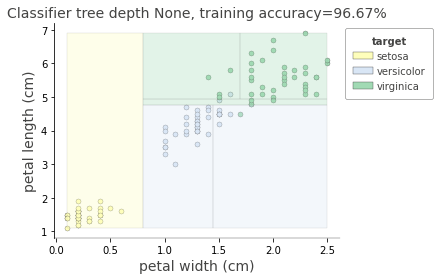

In [ ]:
dtree = DecisionTreeClassifier(min_samples_leaf=5)
dtree.fit(X_train[['petal width (cm)', 'petal length (cm)']], y_train)
ct = ctreeviz_bivar(dtree, X_train[['petal width (cm)', 'petal length (cm)']], y_train,
                     feature_names = ['petal width (cm)', 'petal length (cm)'],
                     class_names=list(data.target_names),
                     target_name='target')
plt.tight_layout()
plt.show()

In [ ]:
dtree = DecisionTreeClassifier(min_samples_leaf=5)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy_score(y_test, ypred)

0.9

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



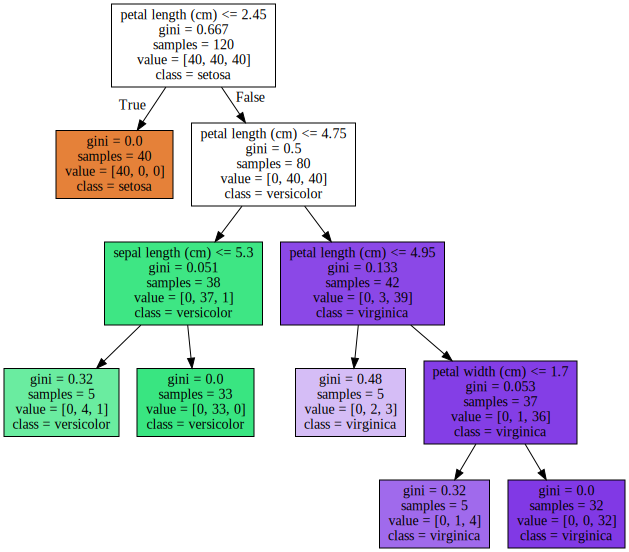

In [ ]:
dot_data = tree.export_graphviz(
    dtree,
    out_file=None,
    feature_names=data.feature_names,
    class_names=data.target_names, filled=True) 
graph = graphviz.Source(dot_data) 
graph

## Wpływ cech

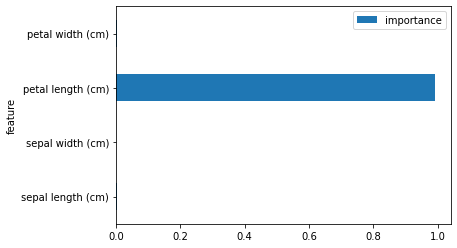

In [ ]:
# this is a comment
pd.DataFrame({'importance': dtree.feature_importances_, 'feature': X.columns}).plot.barh(x='feature', y='importance')

## Wizualizacja wyników

In [ ]:
results = X_test.copy()
results['pred'] = ypred
results['y'] = y_test
results['is_correct'] = ypred == y_test

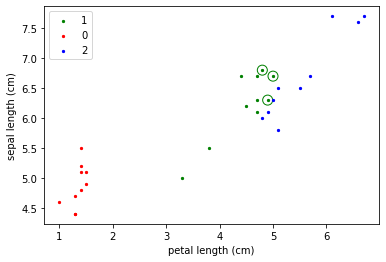

In [ ]:
fig, ax = plt.subplots()
for label in results['y'].unique():
  results[results['y']==label].plot(kind='scatter', x=C.pl, y='sepal length (cm)', s=5, c=colour_dict[label], label=label, ax=ax)
  results[(results['y']==label) & ~results['is_correct']].plot(kind='scatter', x='petal length (cm)', y='sepal length (cm)', s=100, c='none', edgecolors=colour_dict[label], ax=ax)
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
# TODO przenieść na górę
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
pipeline = Pipeline([('scaler', MinMaxScaler()), ('knn', knn)])
pipeline.fit(X_train[[C.pl, C.pw]], y_train)
y_pred = pipeline.predict(X_test[[C.pl, C.pw]])

In [ ]:
x_min, x_max = X[C.pl].min() - 1, X[C.pl].max() + 1
y_min, y_max = X[C.pw].min() - 1, X[C.pw].max() + 1
h = 0.1

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

In [ ]:
# TODO nazwy zmiennych
Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'petal width (cm)')

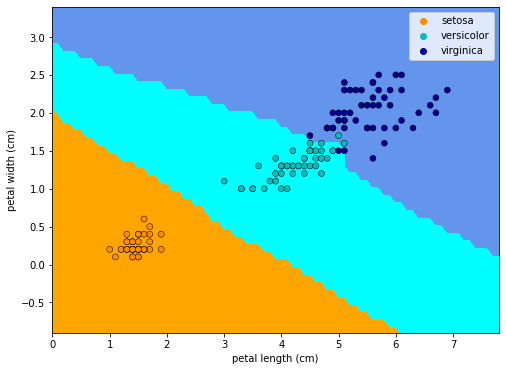

In [ ]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[C.pl], y=X[C.pw], hue=data.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(C.pl)
plt.ylabel(C.pw)

Text(0, 0.5, 'petal width (cm)')

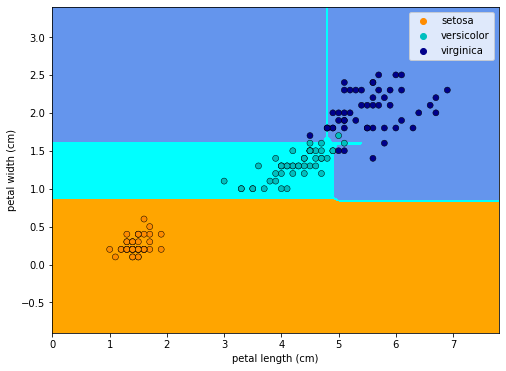

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train[[C.pl, C.pw]], y_train)
y_pred = dt.predict(X_test[[C.pl, C.pw]])

x_min, x_max = X[C.pl].min() - 1, X[C.pl].max() + 1
y_min, y_max = X[C.pw].min() - 1, X[C.pw].max() + 1
h = 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[C.pl], y=X[C.pw], hue=data.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(C.pl)
plt.ylabel(C.pw)

# Walidacja krzyżowa

## Prosty wariant

TODO opis
asdfasdfsdfadf

In [ ]:
from sklearn.model_selection import StratifiedKFold #imblearn

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=25)

cross_val_score(estimator=knn, X=X_train, y=y_train, scoring='accuracy', cv=cv)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.91666667, 1.        , 0.91666667])

In [ ]:
cross_val_score(estimator=dtree, X=X_train, y=y_train, scoring='accuracy', cv=cv)

array([0.75      , 0.91666667, 1.        , 0.91666667, 0.91666667,
       1.        , 1.        , 0.83333333, 1.        , 0.91666667])

## Własna funkcja scoringowa

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, make_scorer

In [ ]:
score_f = lambda y_true, y_predicted: f1_score(y_true=y_true, y_pred=y_predicted, average='weighted')
f1_scorer = make_scorer(score_func=score_f, greater_is_better=True)

In [ ]:
cross_val_score(estimator=knn, X=X_train, y=y_train, scoring=f1_scorer, cv=cv)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.91534392, 1.        , 0.91534392])

In [ ]:
cross_val_score(estimator=dtree, X=X_train, y=y_train, scoring=f1_scorer, cv=cv)

array([0.74603175, 0.91534392, 1.        , 0.91534392, 0.91534392,
       1.        , 1.        , 0.82222222, 1.        , 0.91534392])

## Wariant złożony

In [ ]:
dt_scores_manual=[]
knn_scores_manual=[]
predictions_array = []
y_train = pd.Series(y_train)

fold = 0
for train_idx, test_idx in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    dtree.fit(X_train_cv, y_train_cv)
    knn.fit(X_train_cv, y_train_cv)
    
    # dokonujemy predykcji na zbiorze testowym
    dtree_fold_predict = dtree.predict(X_test_cv)
    knn_fold_predict = knn.predict(X_test_cv)
    
    # zapisujemy predykcje - to się nam bardzo przyda
    predictions = pd.DataFrame({
        'y': y_test_cv,
        'fold': fold,
        'dtree': dtree_fold_predict,
        'knn': knn_fold_predict
    }, index=test_idx)
    predictions_array.append(predictions)

    # liczymy i zapisujemy trafności - to też się zaraz przyda
    dt_fold_score = score_f(y_test_cv, dtree_fold_predict)
    knn_fold_score = score_f(y_test_cv, knn_fold_predict)
    
    dt_scores_manual.append(dt_fold_score)
    knn_scores_manual.append(knn_fold_score)

    fold += 1

In [ ]:
pd.concat(predictions_array)

,y,fold,dtree,knn
1,0,0,0,0
4,0,0,0,0
19,0,0,0,0
36,2,0,1,2
45,2,0,2,2
...,...,...,...,...
78,1,9,2,2
81,0,9,0,0
82,1,9,1,1
101,1,9,1,1


In [ ]:
knn_scores_manual

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9153439153439153,
 1.0,
 0.9153439153439153]

In [ ]:
dt_scores_manual

[0.746031746031746,
 0.9153439153439153,
 1.0,
 0.9153439153439153,
 0.9153439153439153,
 1.0,
 1.0,
 0.8222222222222223,
 1.0,
 0.9153439153439153]

In [ ]:
# TODO przytaczanie źródeł
# https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.1005.1391&rep=rep1&type=pdf
# https://sci2s.ugr.es/keel/pdf/specific/congreso/brazdil00comparison.pdf
# https://www.jmlr.org/papers/volume7/demsar06a/demsar06a.pdf
# https://docs.google.com/spreadsheets/d/1Hsx8xV6gpNFf1tzNG-CRFZsUU_-nh8YX-qfVEmz8J-E/edit?usp=sharing

# Testy

## T-test

In [ ]:
import scipy.stats as st

st.ttest_rel(dt_scores_manual, knn_scores_manual)

Ttest_relResult(statistic=-2.356650367540597, pvalue=0.0428358198379124)

In [ ]:
!pip install pingouin
import pingouin as pg

     |████████████████████████████████| 204kB 12.8MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=e56386fb615da3c3a43f80ed2fc99b674d09044b8650a6142110e607ec5e1cfb
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=e80269c7b2e68bfd097cdd112d6af383b02d88b1440142bc3f3bbd99b3ae23c9
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [ ]:
pg.ttest(dt_scores_manual, knn_scores_manual, paired=True, tail='one-sided')

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-2.35665,9,less,0.021418,"[-inf, -0.01]",0.919634,3.965,0.849678


## Wilcoxon

In [ ]:
pg.wilcoxon(dt_scores_manual, knn_scores_manual, tail='one-sided')

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning:

Sample size too small for normal approximation.



,W-val,tail,p-val,RBC,CLES
Wilcoxon,0.0,less,0.027237,-1.0,0.72


In [ ]:
cv_scores = pd.DataFrame({
    'dtree': dt_scores_manual,
    'knn': knn_scores_manual,
    'fold': range(10),
}).melt(id_vars='fold', value_vars=['knn', 'dtree'], var_name='classifier', value_name='score')

## Homoskedastyczność

In [ ]:
pg.homoscedasticity(data=cv_scores, dv='score', group='classifier')

,W,pval,equal_var
levene,4.057722,0.059161,True


## Normalność

In [ ]:
pg.normality(data=cv_scores, dv='score', group='classifier')

,W,pval,normal
knn,0.509275,0.000005,False
dtree,0.827874,0.031545,False


## ANOVA

In [ ]:
pg.anova(data=cv_scores, dv='score', between='classifier')

,Source,ddof1,ddof2,F,p-unc,np2
0,classifier,1,18,4.228633,0.054542,0.190234


In [ ]:
pg.kruskal(data=cv_scores, dv='score', between='classifier')

,Source,ddof1,H,p-unc
Kruskal,classifier,1,3.64559,0.056218


## MacNemar

In [ ]:
preds = pd.concat(predictions_array)
#preds = preds[preds['fold']==0]
preds['dtree'] = preds['dtree']!=preds['y']
preds['knn'] = preds['knn']!=preds['y']
preds['dummy'] = 1
tmp = pd.DataFrame({'dtree':[False, False, True, True], 'knn':[False, True, False, True], 'dummy': [0, 0, 0, 0]})
preds_all = pd.concat([preds, tmp])
preds_all = preds_all[['dtree', 'knn', 'dummy']].astype(int)
preds_grouped = preds_all[['dtree', 'knn', 'dummy']].groupby(['dtree', 'knn']).sum().reset_index()
table = pd.pivot_table(preds_grouped, index='dtree', columns='knn', aggfunc='sum').fillna(0).values

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
mc = mcnemar(table)
mc.pvalue

0.015625

In [ ]:
table

array([[111,   0],
       [  7,   2]])

# Przeszukiwanie przestrzeni hiperparametrów

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#DecisionTreeClassifier()
gs_tree = GridSearchCV(estimator=dtree, 
             param_grid={'min_samples_leaf': range(1, 20)}, 
             scoring='accuracy', 
             cv=cv
             )

In [ ]:
%%timeit
gs_tree_results = gs_tree.fit(X_train, y_train)

1 loop, best of 5: 621 ms per loop


In [ ]:
gs_tree_results.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

In [ ]:
pd.DataFrame(gs_tree_results.cv_results_).sort_values('rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.001387,0.000285,0.000708,0.000304,3,{'min_samples_leaf': 3},0.833333,0.916667,1.0,1.000000,1.000000,1.0,1.0,0.916667,1.0,0.916667,0.958333,0.055902,1
3,0.002594,0.000831,0.001123,0.000343,4,{'min_samples_leaf': 4},0.833333,0.916667,1.0,1.000000,1.000000,1.0,1.0,0.916667,1.0,0.916667,0.958333,0.055902,1
4,0.002074,0.000424,0.000962,0.000364,5,{'min_samples_leaf': 5},0.833333,0.916667,1.0,1.000000,1.000000,1.0,1.0,0.916667,1.0,0.916667,0.958333,0.055902,1
9,0.001894,0.000115,0.000852,0.000029,10,{'min_samples_leaf': 10},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,4
16,0.002423,0.000770,0.001052,0.000313,17,{'min_samples_leaf': 17},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,4


In [ ]:
from scipy.stats import randint

In [ ]:
rs_tree = RandomizedSearchCV(estimator=dtree, 
             param_distributions={'min_samples_leaf': randint(low=1, high=20)}, 
             scoring='accuracy', 
             cv=cv
             )

In [ ]:
#%%timeit
rs_tree_results = rs_tree.fit(X_train, y_train)

In [ ]:
pd.DataFrame(rs_tree_results.cv_results_).sort_values('rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,0.001954,0.000131,0.000860,0.000027,3,{'min_samples_leaf': 3},0.833333,0.916667,1.0,1.000000,1.000000,1.0,1.0,0.916667,1.0,0.916667,0.958333,0.055902,1
0,0.002397,0.000810,0.001014,0.000315,9,{'min_samples_leaf': 9},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
1,0.001661,0.000486,0.000841,0.000347,17,{'min_samples_leaf': 17},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
2,0.001277,0.000059,0.000609,0.000017,18,{'min_samples_leaf': 18},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
3,0.002205,0.000465,0.001099,0.000277,2,{'min_samples_leaf': 2},0.833333,0.916667,1.0,0.916667,1.000000,1.0,1.0,0.833333,1.0,0.916667,0.941667,0.065085,2


In [ ]:
pd.DataFrame(rs_tree_results.cv_results_).sort_values('param_min_samples_leaf', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.002205,0.000465,0.001099,0.000277,2,{'min_samples_leaf': 2},0.833333,0.916667,1.0,0.916667,1.000000,1.0,1.0,0.833333,1.0,0.916667,0.941667,0.065085,2
7,0.001954,0.000131,0.000860,0.000027,3,{'min_samples_leaf': 3},0.833333,0.916667,1.0,1.000000,1.000000,1.0,1.0,0.916667,1.0,0.916667,0.958333,0.055902,1
0,0.002397,0.000810,0.001014,0.000315,9,{'min_samples_leaf': 9},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
4,0.001972,0.000057,0.000876,0.000016,9,{'min_samples_leaf': 9},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
5,0.002015,0.000314,0.001002,0.000331,11,{'min_samples_leaf': 11},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
9,0.001966,0.000261,0.000911,0.000089,11,{'min_samples_leaf': 11},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
8,0.002356,0.000502,0.001106,0.000276,14,{'min_samples_leaf': 14},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
6,0.002092,0.000437,0.001013,0.000392,15,{'min_samples_leaf': 15},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
1,0.001661,0.000486,0.000841,0.000347,17,{'min_samples_leaf': 17},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2
2,0.001277,0.000059,0.000609,0.000017,18,{'min_samples_leaf': 18},0.833333,0.916667,1.0,0.916667,0.916667,1.0,1.0,0.916667,1.0,0.916667,0.941667,0.053359,2


In [ ]:
# https://automl.github.io/auto-sklearn/master/#example
# http://epistasislab.github.io/tpot/

In [ ]:
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
             param_grid={'n_neighbors': range(1, 20), 'weights': ['uniform'], 'p': [2]}, 
             scoring='accuracy', 
             cv=cv
             )
gs_knn_results = gs_knn.fit(X_train, y_train)

In [ ]:
pd.DataFrame(gs_knn_results.cv_results_).sort_values('rank_test_score', ascending=True).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.001486,0.000052,0.001883,0.000149,4,2,uniform,"{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.916667,1.0,0.916667,0.983333,0.033333,1
4,0.001536,0.000071,0.001896,0.000102,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.916667,1.0,0.916667,0.983333,0.033333,1
10,0.002038,0.000434,0.002547,0.000599,11,2,uniform,"{'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.916667,1.0,0.916667,0.983333,0.033333,1


# Estymatory referencyjne

## Naiwny estymator

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dc = DummyClassifier(strategy='stratified', random_state=10)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.20      0.22        10
           1       0.29      0.40      0.33        10
           2       0.25      0.20      0.22        10

    accuracy                           0.27        30
   macro avg       0.26      0.27      0.26        30
weighted avg       0.26      0.27      0.26        30



## Własny estymator

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class ExpertClassifier(BaseEstimator, ClassifierMixin):

  def __init__(self, param=5, petal_len_name='petal length (cm)'):
    self.param = param
    self.petal_len_name = petal_len_name

  def fit(self, X, y):

    if type(results)!=pd.DataFrame:
      raise Exception('Handles only df')
    elif self.petal_len_name not in X.columns:
      raise Exception('No column')

    X, y = check_X_y(X[[self.petal_len_name]], y)
    self.classes_ = unique_labels(y)
    
    self.X_ = X
    self.y_ = y
    return self

  def predict_one(self, x):
    if x < 2.5:
      return 0
    elif x < self.param:
      return 1
    else:
      return 2

  def predict(self, X):
    check_is_fitted(self)

    X = check_array(X[[self.petal_len_name]])

    return np.apply_along_axis(self.predict_one, 1, X)

In [ ]:
ec = ExpertClassifier(param=5)
ec.fit(X_train, y_train)
y_pred = ec.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



## Porównanie wielu estymatorów

In [ ]:
# TODO funkcja
classifiers = {
    'dtree': DecisionTreeClassifier(random_state=555),
    'knn': KNeighborsClassifier(),
    'grid': GridSearchCV(estimator=KNeighborsClassifier(), 
                         param_grid={'weights': ['uniform', 'distance'],
                                     'n_neighbors': range(3, 10)
                                     }),
    'dummy': DummyClassifier(strategy="stratified", random_state=0),
    'expert': ExpertClassifier(param=4),
    'pipe': Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())]),
}
predictions_array = []
y_train = pd.Series(y_train)
scores_array = []

# Manualnie dzielimy dane wg. deterministycznego próbkowania
fold = 0
for train_idx, test_idx in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    # szkolimy klasfikatory
    predictions = {}
    for k, v in classifiers.items():
      v.fit(X_train_cv, y_train_cv)
      if k == 'grid':
        v = v.best_estimator_
      predictions[k] = v.predict(X_test_cv)
      score = f1_score(y_true=y_test_cv, y_pred=predictions[k], average='weighted')
      scores_array.append({'score': score, 'fold': fold, 'classifier': k})
    
    # zapisujemy predykcje - to się nam bardzo przyda
    predictions = pd.DataFrame(predictions, index=test_idx)
    predictions['y'] = y_test_cv
    predictions['fold'] = fold
    predictions_array.append(predictions)

    fold += 1

In [ ]:
pd.concat(predictions_array).head()

,dtree,knn,grid,dummy,expert,pipe,y,fold
1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
19,0,0,0,1,0,0,0,0
36,1,2,2,1,2,1,2,0
45,2,2,2,0,2,2,2,0


In [ ]:
scores = pd.DataFrame(scores_array)

In [ ]:
scores.head()

,score,fold,classifier
0,0.746032,0,dtree
1,1.000000,0,knn
2,0.915344,0,grid
3,0.265152,0,dummy
4,0.822222,0,expert


<a href="#haczyk">adfsdf</a>

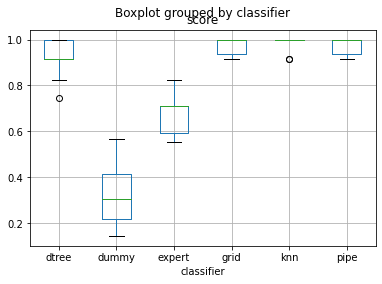

In [ ]:
scores.boxplot(column='score', by='classifier')

# (Naj)lepszy model i jego statstyki

# Deployment

In [ ]:
import pickle

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

filename='super_irysy_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
saved_model = pickle.load(open(filename, 'rb'))

In [ ]:
accuracy_score(y_test, saved_model.predict(X_test))

0.9333333333333333

In [ ]:
accuracy_score(y_test, knn.predict(X_test))

0.9333333333333333

# Markdown - wskazówki

**bold**, *italic*

In [ ]:
from IPython.display import Markdown as md

In [ ]:
md('Irysy są super! <3 **{}**'.format(X.shape[0]))

Irysy są super! <3 **150**

<img src="https://zielonyogrodek.pl/i/images/1/8/7/d2FjPTExNTV4MQ==_src_83187-Kosaciec-irys-fot.-smet-ahin---Pixabay.jpg" width=100/>

$\sqrt{k}$

<a name="haczyk">haczyk</a>